# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# model building
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# evaluation libraries
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
learn = pd.read_csv("ExtraaLearn.csv")

# copy code for sanity check:
df = learn.copy()

Data brief analysis:

In [ ]:
# First 5 rows:

df.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
# Last 5 rows:

df.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


Data Shape:

In [ ]:
df.shape

(4612, 15)

In [ ]:
# Find all types for each data category
df.dtypes

,0
ID,object
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object


In [ ]:
# Look for total duplicate data
df.duplicated().sum()

0

No duplicate data is found. Based on the shape, the data is very sparse with only 15 columns but over 4000 columns! Most of the data is an object type, with only 4 integer types.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Statistical Data

In [ ]:
# Start with a quick summary of each category of data:

df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


We see that mostly older people are in this dataset with the median age being 51 and mean being 46. The average website visits for this are 3.5 ish and from the mean for status, status being a binary variable, we can see that most leads are not converted.

In [ ]:
# Now we can create a list of the object type data and find the number of unique objects for each type of object:
object = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for col in object:
    print(df[col].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [ ]:
# We can now use the IDs to find the number of unique values within the data
df["ID"].nunique()

4612

# Univariate Analysis

Age

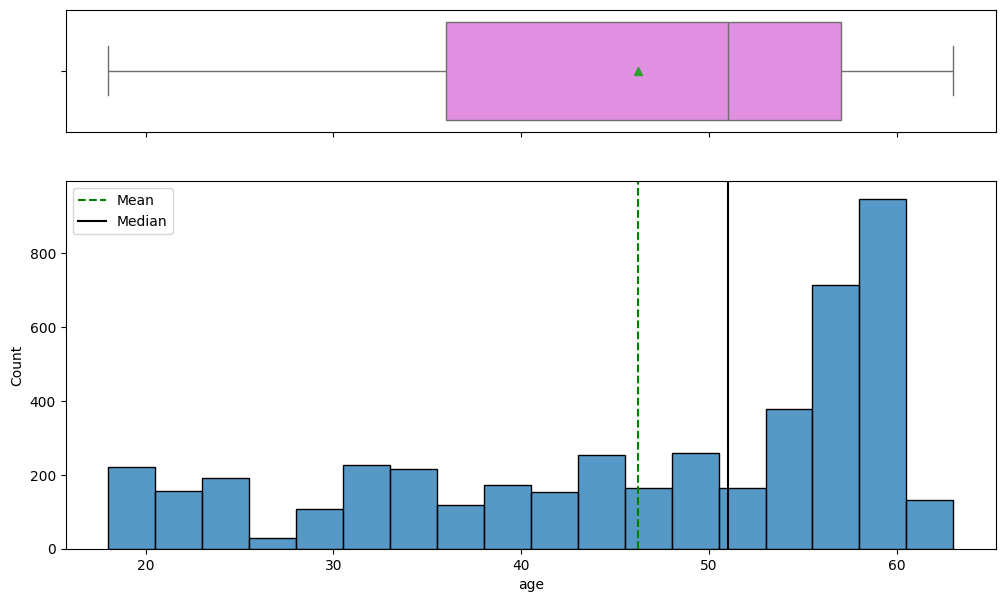

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (12, 7)

# Create a 2-row subplot grid, sharing the x-axis
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)

sns.boxplot(
    data=df, x="age", ax=ax_box2, showmeans=True, color="violet"
)

# Plot the histogram
sns.histplot(
    data=df, x="age", kde=False, ax=ax_hist2, palette="winter"
)

ax_hist2.axvline(
    df["age"].mean(), color="green", linestyle="--", label='Mean'
)
ax_hist2.axvline(
    df["age"].median(), color="black", linestyle="-", label='Median'
)

ax_hist2.legend()

# Show the plots
plt.show()


We can see that the age in the data set is skewed to the left with a disproportionate amount of people being in their late 50s, and median age being in the early 50s.

Website Visits

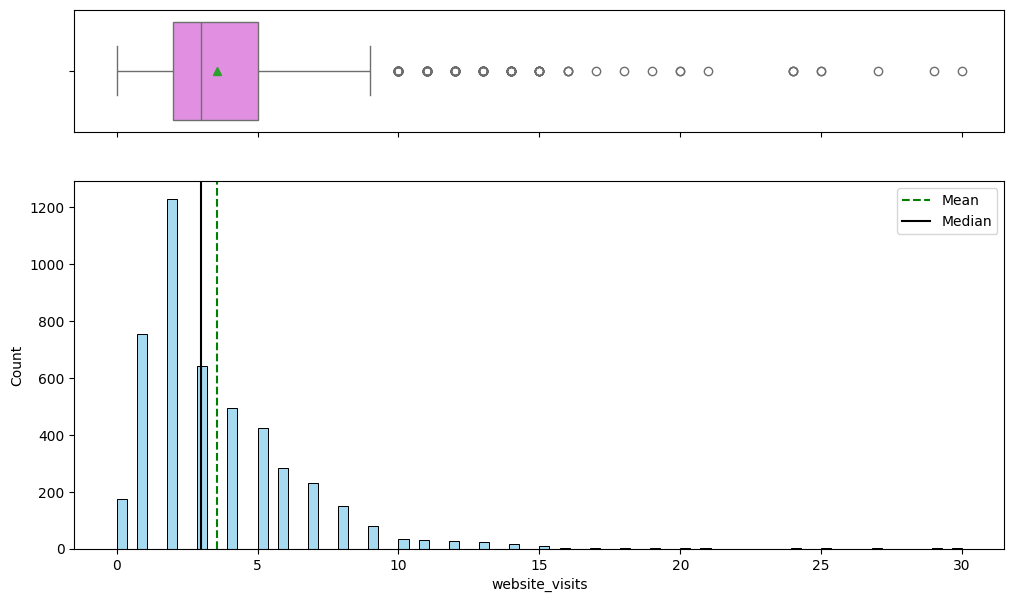

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire plot
figsize = (12, 7)

# Create a 2-row subplot grid, sharing the x-axis
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,  # Number of rows of the subplot grid= 2
    sharex=True,  # x-axis will be shared among all subplots
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)

# Plot the boxplot for website visits
sns.boxplot(
    data=df, x="website_visits", ax=ax_box2, showmeans=True, color="violet"
)

# Plot the histogram for website visits
sns.histplot(
    data=df, x="website_visits", kde=False, ax=ax_hist2, color="skyblue"
)

# Add mean and median lines to the histogram
ax_hist2.axvline(
    df["website_visits"].mean(), color="green", linestyle="--", label='Mean'
)
ax_hist2.axvline(
    df["website_visits"].median(), color="black", linestyle="-", label='Median'
)

# Add legend to the histogram
ax_hist2.legend()

# Show the plots
plt.show()


This histogram for website_visits shows a right skewed distribution with the most common amount of visits being at 2, and a very small percent of people visit the website more than 10 times.

Time spent on Website

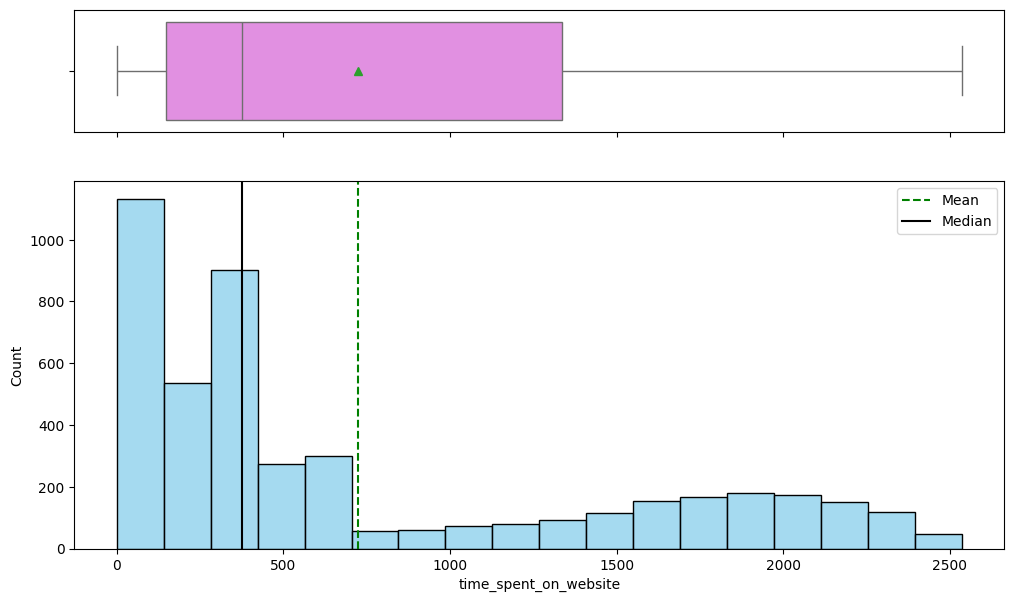

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire plot
figsize = (12, 7)

# Create a 2-row subplot grid, sharing the x-axis
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,  # Number of rows of the subplot grid= 2
    sharex=True,  # x-axis will be shared among all subplots
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)

# Plot the boxplot for time spent on the website
sns.boxplot(
    data=df, x="time_spent_on_website", ax=ax_box2, showmeans=True, color="violet"
)

# Plot the histogram for time spent on the website
sns.histplot(
    data=df, x="time_spent_on_website", kde=False, ax=ax_hist2, color="skyblue"
)

# Add mean and median lines to the histogram
ax_hist2.axvline(
    df["time_spent_on_website"].mean(), color="green", linestyle="--", label='Mean'
)
ax_hist2.axvline(
    df["time_spent_on_website"].median(), color="black", linestyle="-", label='Median'
)

# Add legend to the histogram
ax_hist2.legend()

# Show the plots
plt.show()


We see that this distribution is also very right skewed with most people spending just a small amount of time on the website (are in the first bar) and there are not many people that spend more than 700 seconds on the website.

Page views per visit

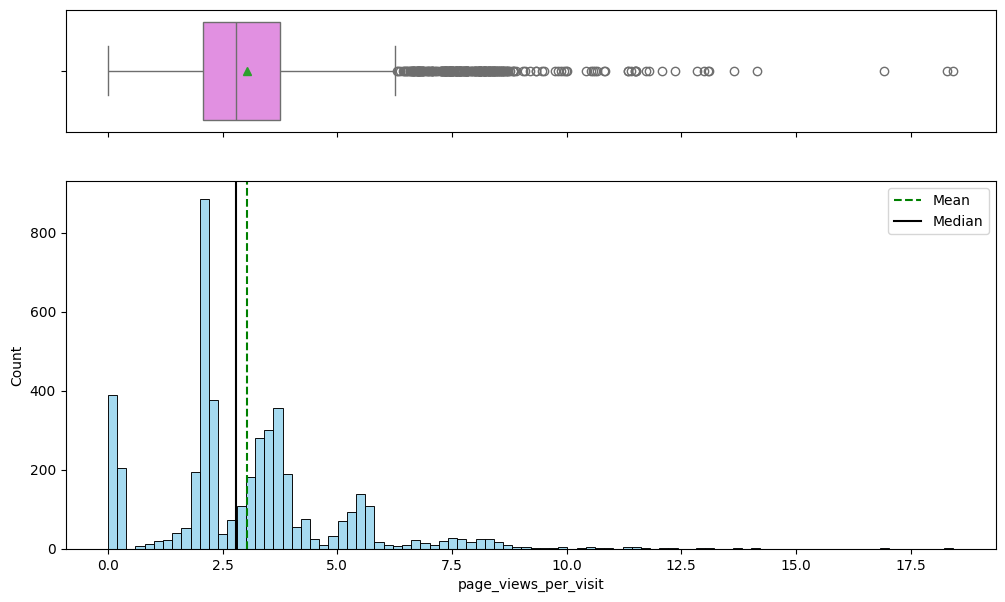

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire plot
figsize = (12, 7)

f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)

sns.boxplot(
    data=df, x="page_views_per_visit", ax=ax_box2, showmeans=True, color="violet"
)

sns.histplot(
    data=df, x="page_views_per_visit", kde=False, ax=ax_hist2, color="skyblue"
)

# Add mean and median lines to the histogram
ax_hist2.axvline(
    df["page_views_per_visit"].mean(), color="green", linestyle="--", label='Mean'
)
ax_hist2.axvline(
    df["page_views_per_visit"].median(), color="black", linestyle="-", label='Median'
)

# Add legend to the histogram
ax_hist2.legend()

# Show the plots
plt.show()


We see that the mode for page views per visit is clearly around 2.3 or 2.4, and people don't tend to have more than 6 page views per visit. This distribution is also heavily skewed to the right.

Current occupation

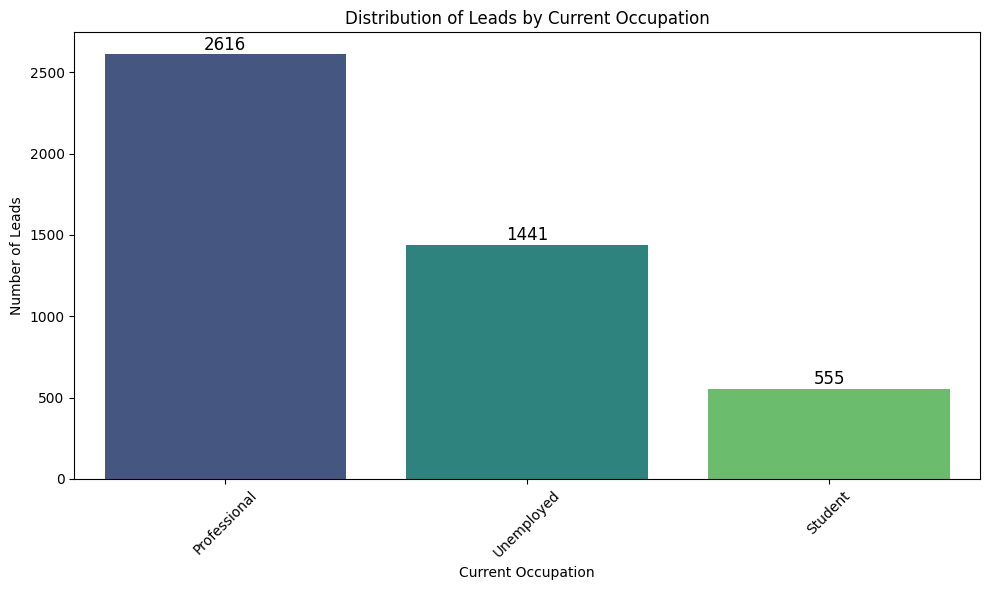

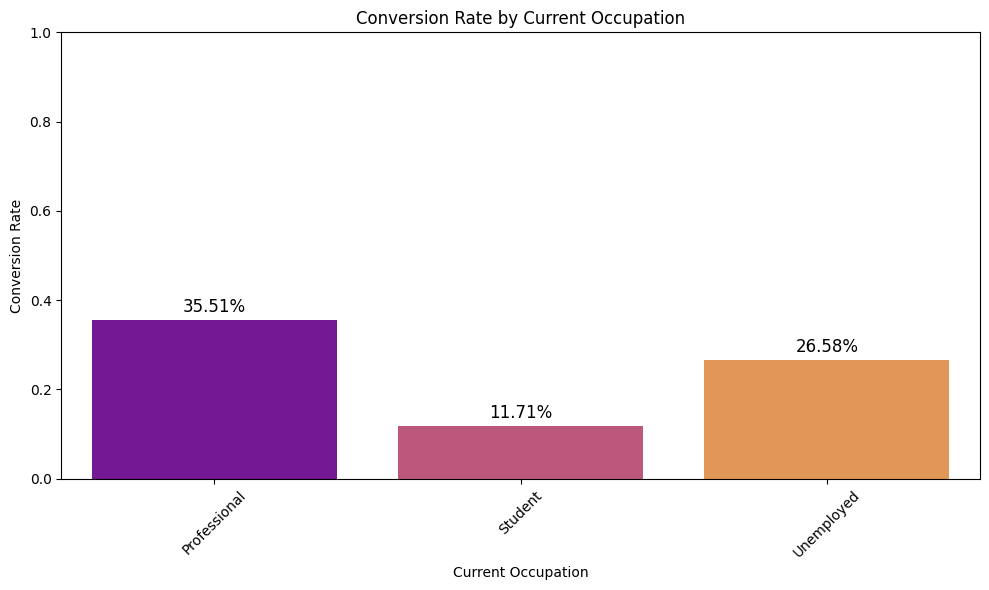

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by current occupation
occupation_counts = df['current_occupation'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')

for i, count in enumerate(occupation_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the conversion rate by current occupation
conversion_rate_by_occupation = df.groupby('current_occupation')['status'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_by_occupation.index, y=conversion_rate_by_occupation.values, palette='plasma')

for i, rate in enumerate(conversion_rate_by_occupation.values):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We see that most leads are people in a job, professional, followed by student leads and then unemployed leads. As for conversion rates, professional leads have the highest rates, while unemployed leads have a higher conversion rate than student leads despite having less overall leads.

First Interaction

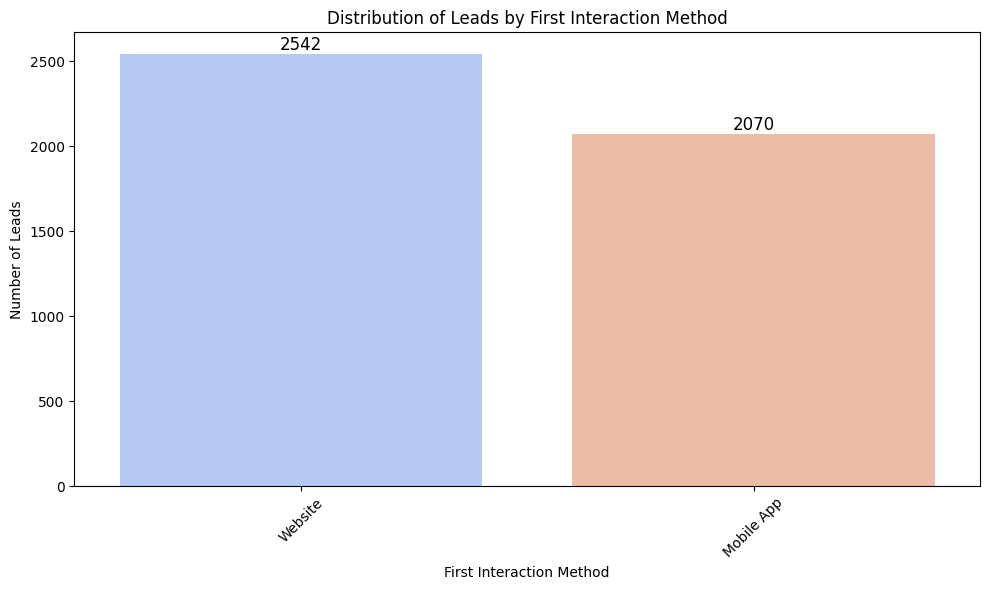

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by first interaction method
interaction_counts = df['first_interaction'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=interaction_counts.index, y=interaction_counts.values, palette='coolwarm')

for i, count in enumerate(interaction_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by First Interaction Method')
plt.xlabel('First Interaction Method')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


There isn't a massive difference between the amount of leads that had their first interaction via website versus mobile app, but we do see that a noticeably larger number of leads had their first interaction from the website.

Profile completed

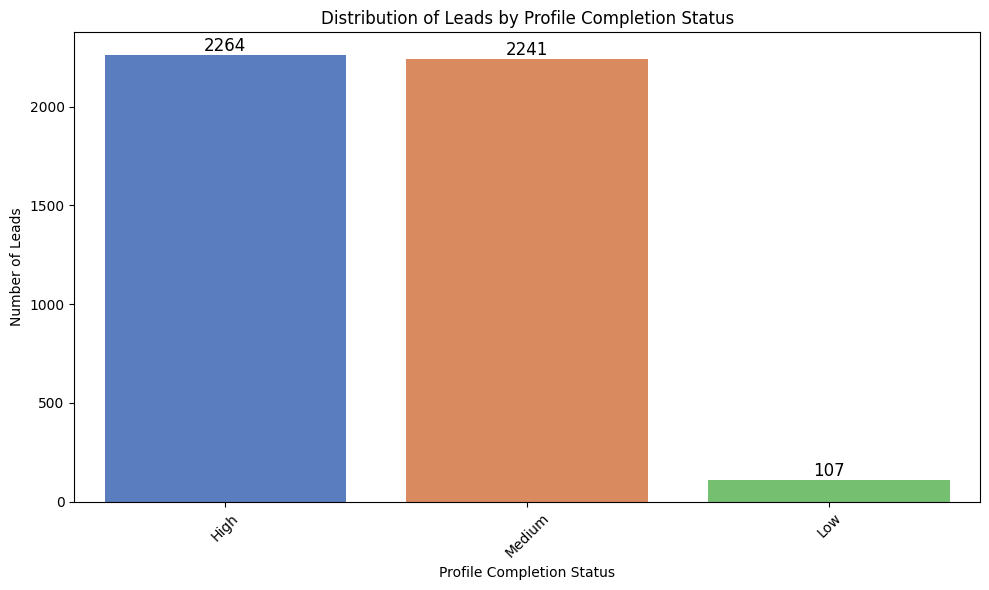

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by profile completion status
profile_completion_counts = df['profile_completed'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=profile_completion_counts.index, y=profile_completion_counts.values, palette='muted')

for i, count in enumerate(profile_completion_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Profile Completion Status')
plt.xlabel('Profile Completion Status')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We see that a relatively equal amount of people have High or Medium profile completion status, and most people fall into these two categories, as there is only 107 people with Low profile completion status out of around roughly 4500.

Last Activity

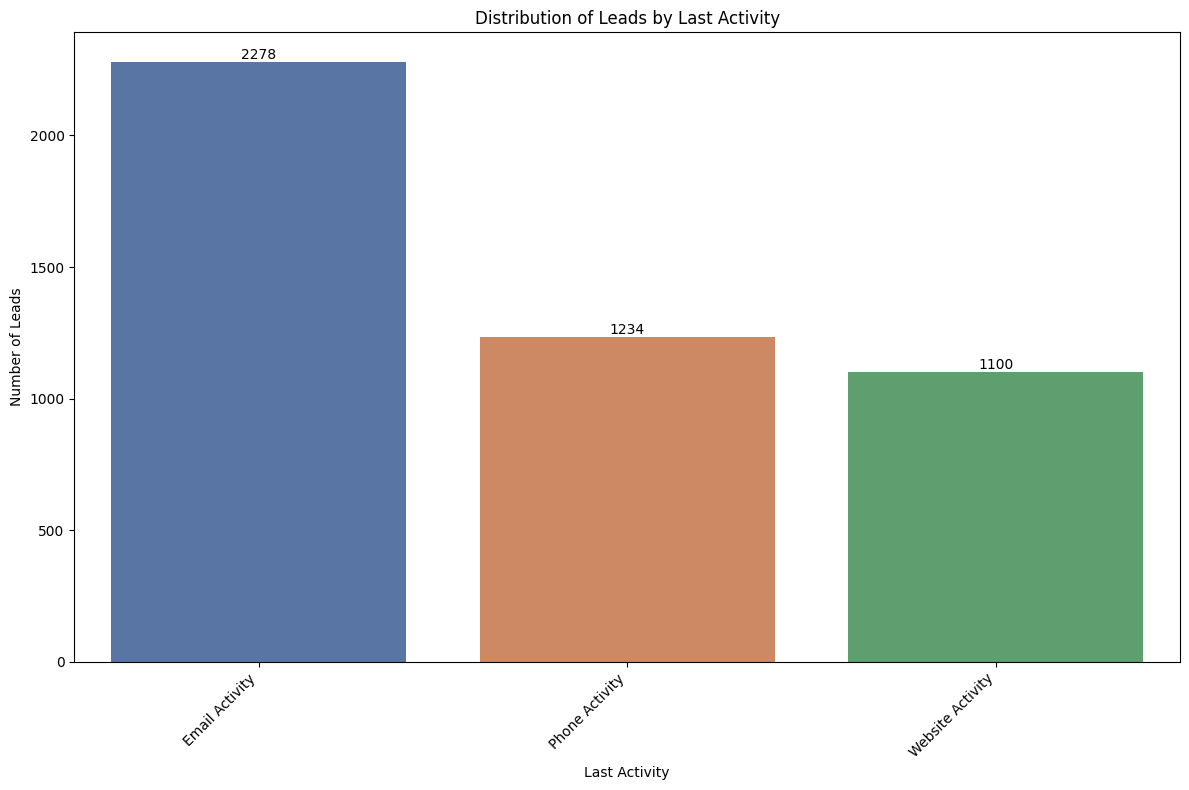

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by last activity
last_activity_counts = df['last_activity'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=last_activity_counts.index, y=last_activity_counts.values, palette='deep')

for i, count in enumerate(last_activity_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Leads by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We see that email activity is easily the largest number of leads's last activity followed by phone activity and website activity.

Print Media Type 1

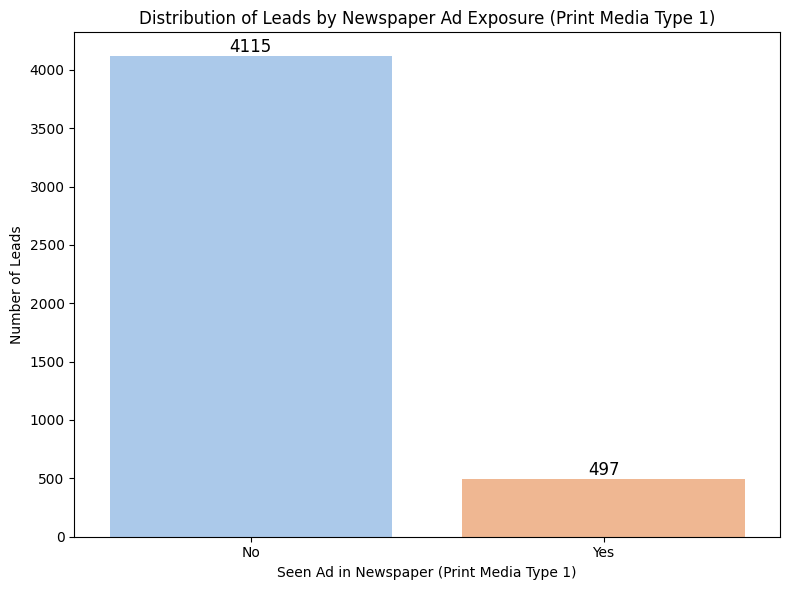

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by print media type 1 exposure
print_media_type1_counts = df['print_media_type1'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=print_media_type1_counts.index, y=print_media_type1_counts.values, palette='pastel')

for i, count in enumerate(print_media_type1_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Newspaper Ad Exposure (Print Media Type 1)')
plt.xlabel('Seen Ad in Newspaper (Print Media Type 1)')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 for not seen and 1 for seen
plt.tight_layout()
plt.show()


Simple graph, the vast majority of leads haven't seen an ad in the newspaper.

Print Media Type 2

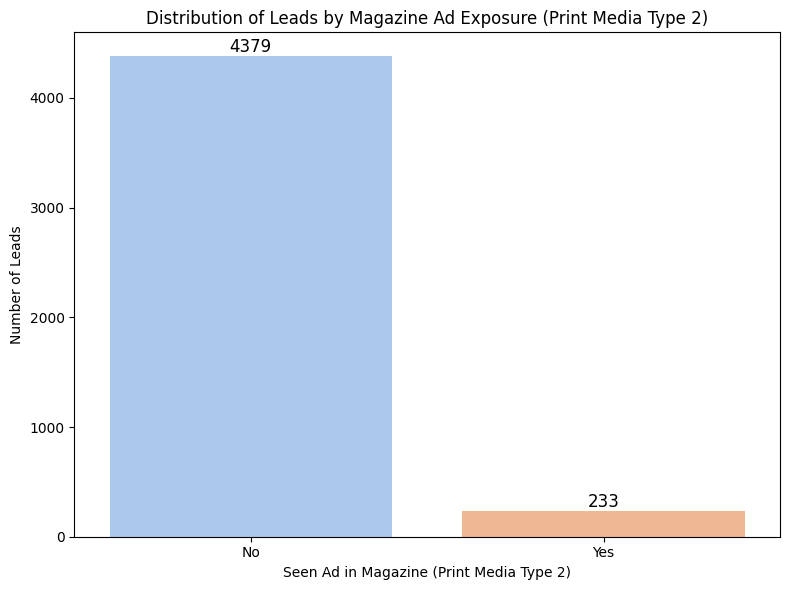

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by print media type 2 exposure
print_media_type2_counts = df['print_media_type2'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=print_media_type2_counts.index, y=print_media_type2_counts.values, palette='pastel')

for i, count in enumerate(print_media_type2_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Magazine Ad Exposure (Print Media Type 2)')
plt.xlabel('Seen Ad in Magazine (Print Media Type 2)')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 for not seen and 1 for seen
plt.tight_layout()
plt.show()


Once again, the vast majority of leads did not see the ad in a magazine.

Digital Media

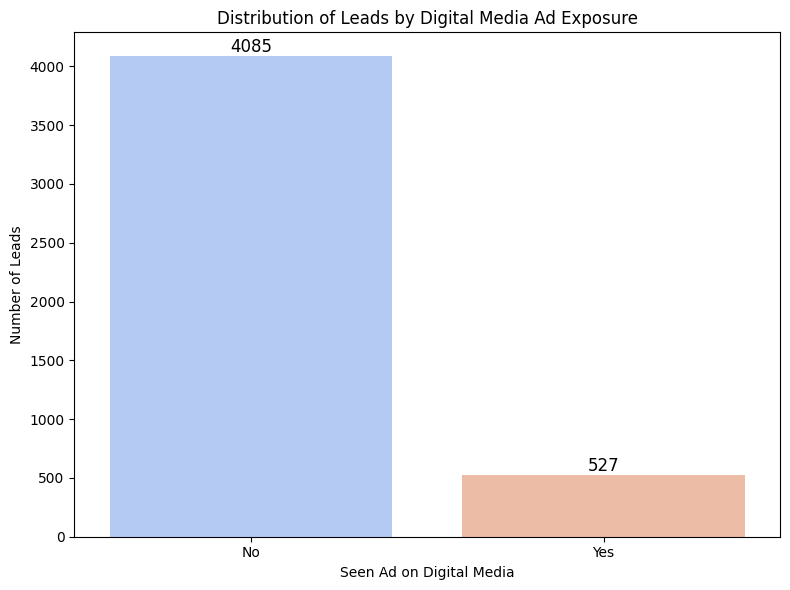

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by digital media exposure
digital_media_counts = df['digital_media'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=digital_media_counts.index, y=digital_media_counts.values, palette='coolwarm')

for i, count in enumerate(digital_media_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Digital Media Ad Exposure')
plt.xlabel('Seen Ad on Digital Media')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 for not seen and 1 for seen
plt.tight_layout()
plt.show()


Out of the media channels, we see that most leads have seen digital media, but a large majority of total leads still did not see an ad on digital media.

Educational channels

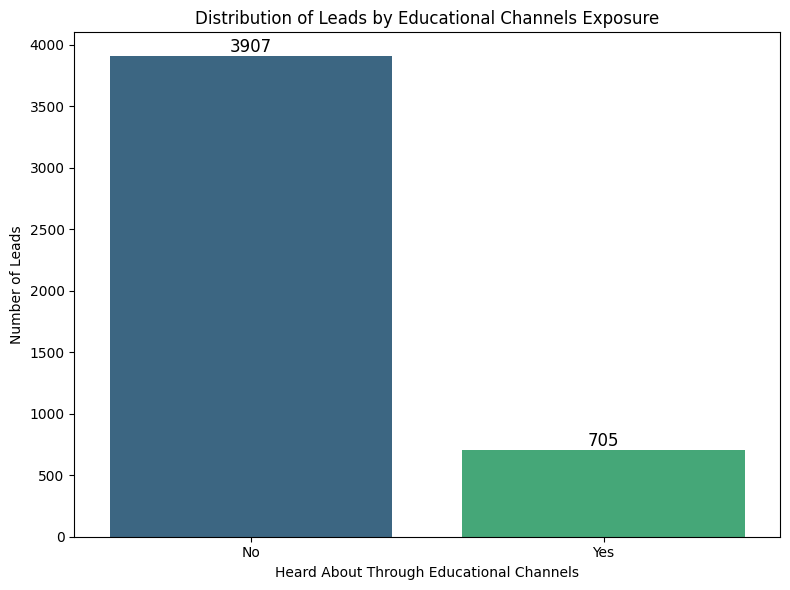

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by educational channels exposure
educational_channels_counts = df['educational_channels'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=educational_channels_counts.index, y=educational_channels_counts.values, palette='viridis')

for i, count in enumerate(educational_channels_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Educational Channels Exposure')
plt.xlabel('Heard About Through Educational Channels')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 for not heard and 1 for heard
plt.tight_layout()
plt.show()


A larger number of leads have heard about ExtraaLearn through Educational Channels than even digital media, but most leads did not hear about them through educational channels.

Referrals

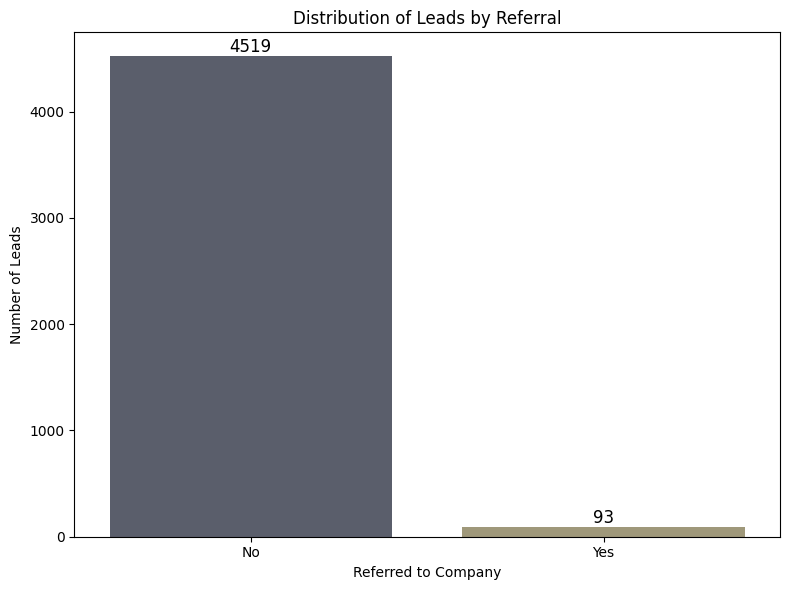

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by referral exposure
referral_counts = df['referral'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=referral_counts.index, y=referral_counts.values, palette='cividis')

for i, count in enumerate(referral_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Referral')
plt.xlabel('Referred to Company')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 for not referred and 1 for referred
plt.tight_layout()
plt.show()


Out of all channels, the least number of people heard of the company via referral.

Status

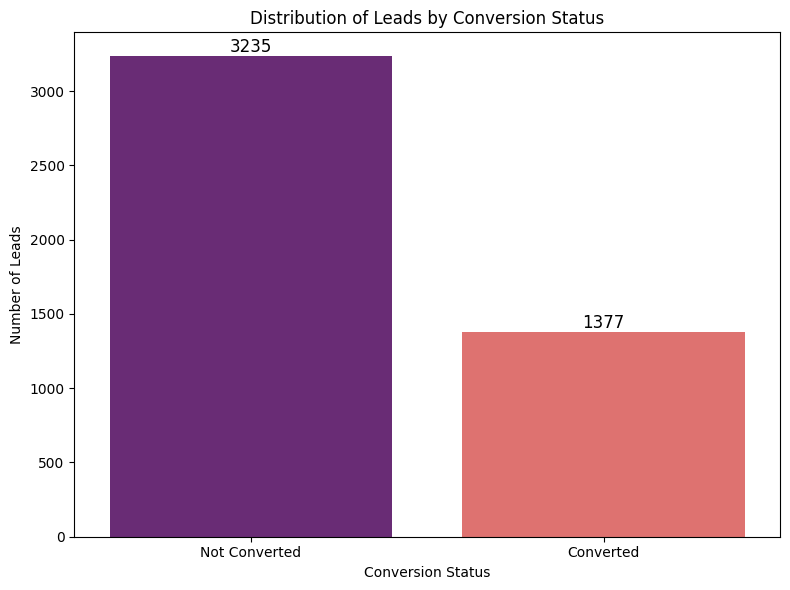

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of leads by status (converted or not)
status_counts = df['status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='magma')

for i, count in enumerate(status_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Leads by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Number of Leads')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])  # Assuming 0 for not converted and 1 for converted
plt.tight_layout()
plt.show()


Most leads in this database have not been converted.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

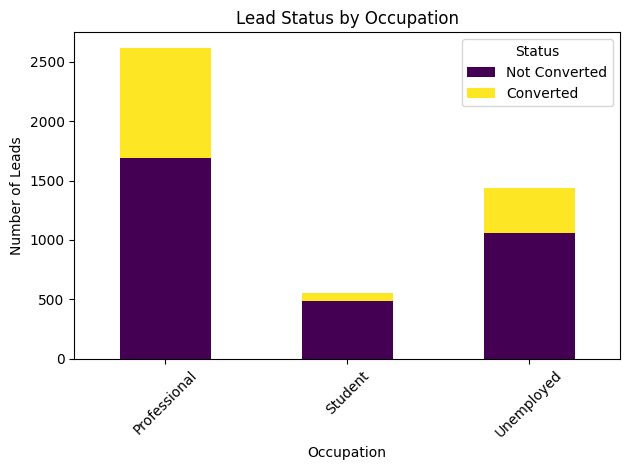

In [ ]:
occupation_lead_status = df.groupby(['current_occupation', 'status']).size().unstack()

# Plotting occupation vs. lead status
occupation_lead_status.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Lead Status by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

Following the graph above, we see that the largest proportion of converted leads is found in a professional occupation, while the smallest proportion of converted leads is found in the student occupation with the unemployed category having a proportion of converted leads in between those.

Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

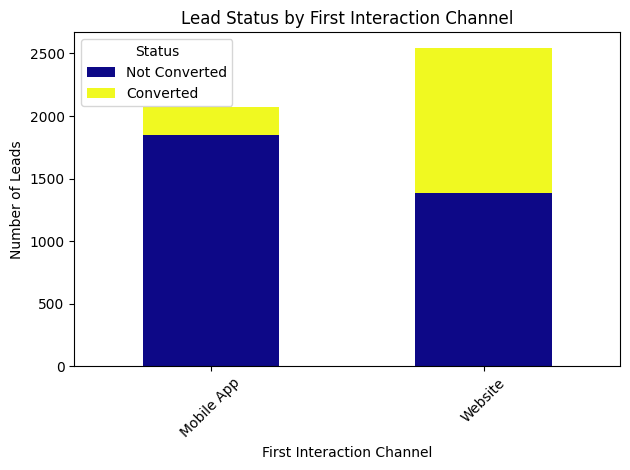

In [ ]:
interaction_channel_lead_status = df.groupby(['first_interaction', 'status']).size().unstack()

# Plotting first interaction channel vs. lead status
interaction_channel_lead_status.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Lead Status by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

From the graph above, it does appear that the first channel of interaction affects lead status with a first channel of website having a significantly greater proportion of converted leads than those who's first channel of interaction was through the mobile app.

Question 3: The company uses multiple modes to interact with prospects. Which way of interaction works best?

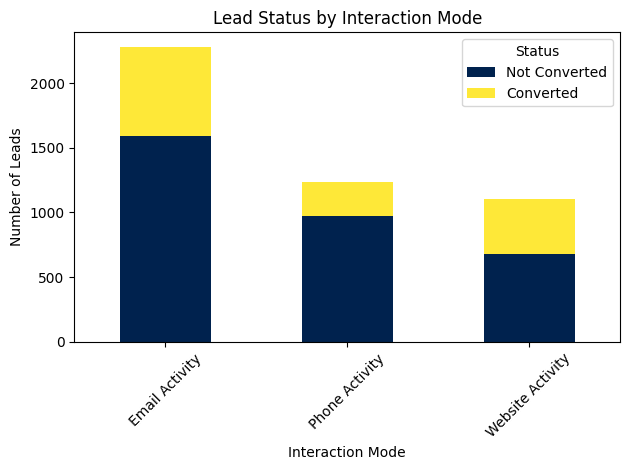

In [ ]:
interaction_modes = ['Email Activity', 'Phone Activity', 'Website Activity']
interaction_mode_lead_status = df.groupby(['last_activity', 'status']).size().unstack()

# Plotting interaction mode vs. lead status
interaction_mode_lead_status.loc[interaction_modes].plot(kind='bar', stacked=True, colormap='cividis')
plt.title('Lead Status by Interaction Mode')
plt.xlabel('Interaction Mode')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

Both Email Activity and Website Activity are successful. Website Activity is successful in the sense that out of those reached by Website activity, out of the modes of interaction the people interacting with the website have the highest rate of converted leads. However, Email Activity, despite having a smaller proportion of converted leads has a much greater volume of leads and thus has a larger number of converted leads. It's safe to conclude that Phone Activity is the least successful because it neither has the largest proportion of converted leads nor the greatest number (smallest in both categories).

Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

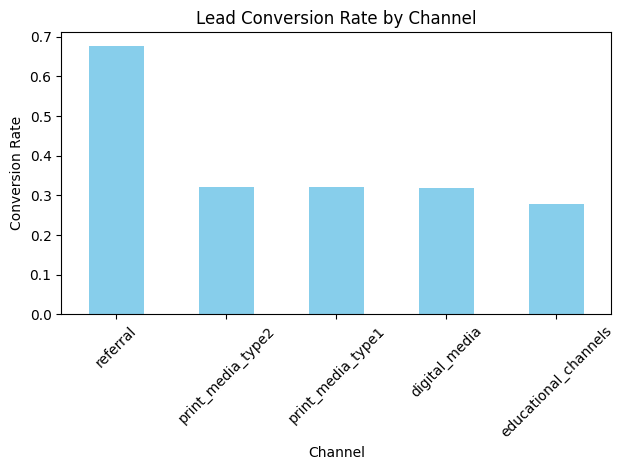

In [ ]:
channel_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Calculate conversion rate for each channel
channel_conversion_rates = {col: df.groupby(col)['status'].mean()[1] for col in channel_columns}

# Convert to Series for plotting
channel_conversion_series = pd.Series(channel_conversion_rates)

# Plotting conversion rates by channel
channel_conversion_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Lead Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Through the analysis and bar graph above, we find that by far and away referrals are the channel with the greatest lead conversion rate (of around 0.68), more than doubling the conversion rate of the next most successful channel. Following referrals, print media of both types are the next most successful channels with both of these channels having a conversion rate of around 0.32.

Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

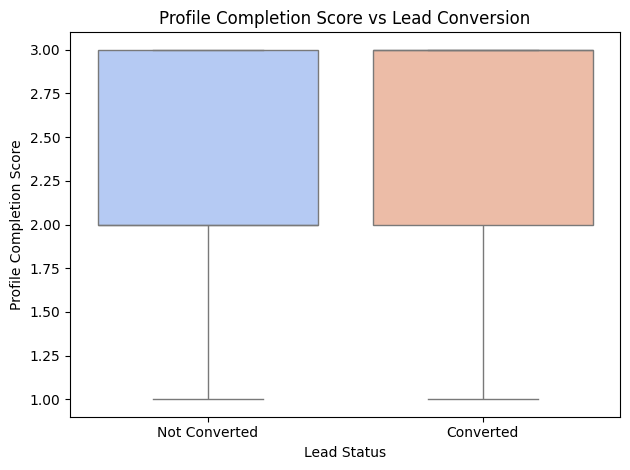

Correlation between profile completion score and lead conversion: 0.26


In [ ]:
profile_completion_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['profile_completion_score'] = df['profile_completed'].map(profile_completion_mapping)

# Boxplot for profile completion vs. lead status
sns.boxplot(data=df, x='status', y='profile_completion_score', palette='coolwarm')
plt.title('Profile Completion Score vs Lead Conversion')
plt.xlabel('Lead Status')
plt.ylabel('Profile Completion Score')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()

# Calculating correlation between profile completion score and lead conversion
correlation = df['profile_completion_score'].corr(df['status'])
print(f"Correlation between profile completion score and lead conversion: {correlation:.2f}")

Focusing on the correlation score between profile completion score and lead conversion, we find that there does not appear to be a convicing correlation between having more details and lead status. In fact, the correlation score being 0.26, makes this correlation really weak, and there is no evidence to back the claim that having more details about a prospect, or a higher profile completion score, translates to a higher conversion rate.

Outlier Check

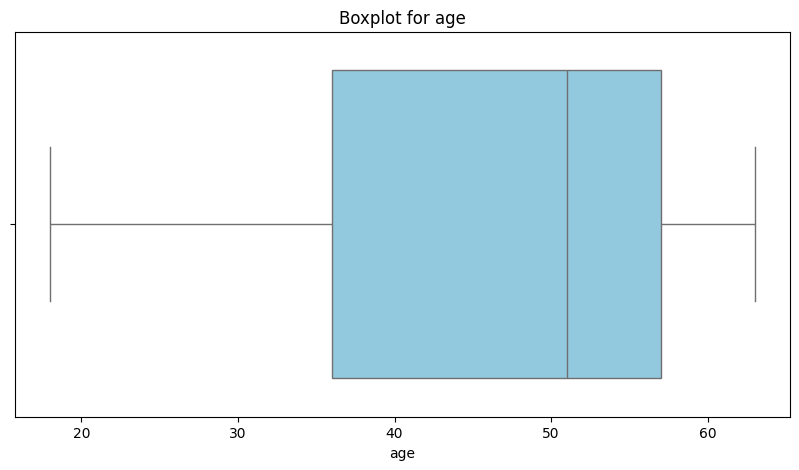

Outliers in age:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status, profile_completion_score]
Index: []
----------------------------------------


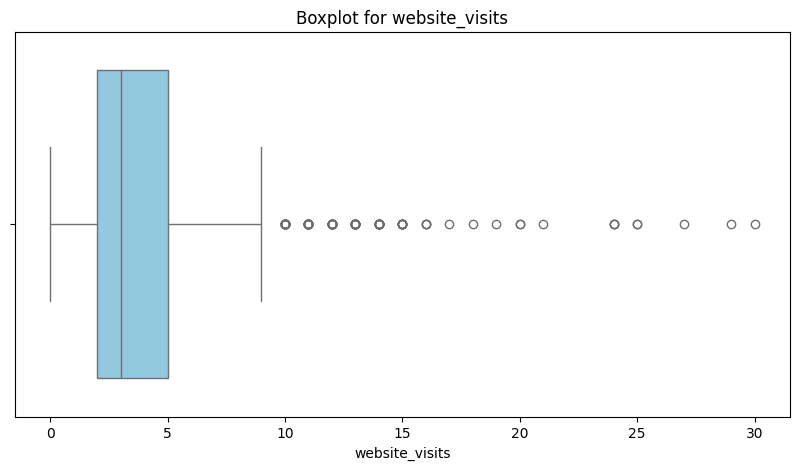

Outliers in website_visits:
           ID  age current_occupation first_interaction profile_completed  \
6      EXT007   56       Professional        Mobile App            Medium   
31     EXT032   55         Unemployed           Website            Medium   
32     EXT033   58       Professional        Mobile App              High   
66     EXT067   59         Unemployed        Mobile App            Medium   
201    EXT202   57       Professional        Mobile App              High   
202    EXT203   46       Professional        Mobile App            Medium   
212    EXT213   46       Professional           Website            Medium   
262    EXT263   55       Professional           Website              High   
266    EXT267   37         Unemployed        Mobile App            Medium   
311    EXT312   49       Professional           Website            Medium   
381    EXT382   60       Professional           Website            Medium   
388    EXT389   28       Professional        Mob

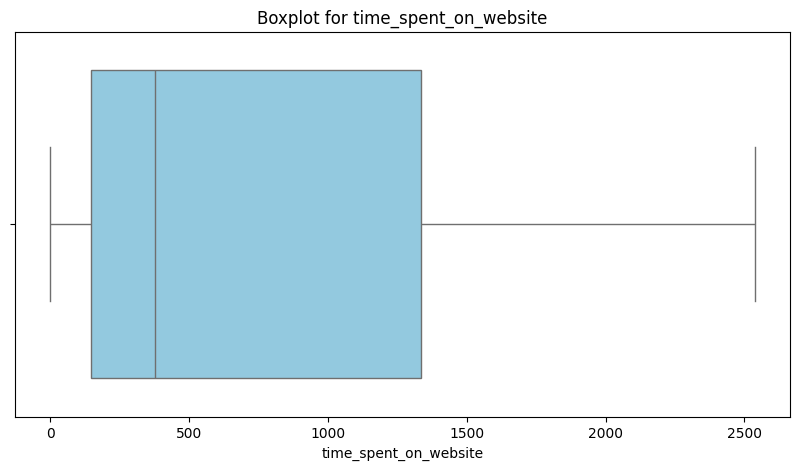

Outliers in time_spent_on_website:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status, profile_completion_score]
Index: []
----------------------------------------


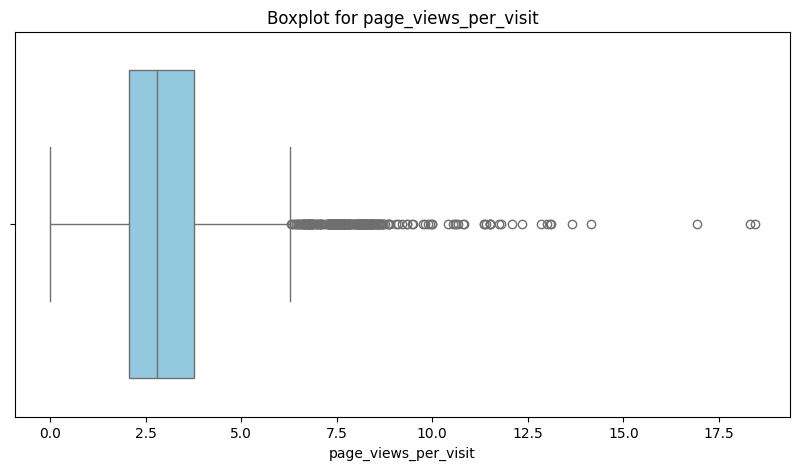

Outliers in page_views_per_visit:
           ID  age current_occupation first_interaction profile_completed  \
4      EXT005   23            Student           Website              High   
32     EXT033   58       Professional        Mobile App              High   
47     EXT048   35       Professional        Mobile App            Medium   
110    EXT111   31       Professional           Website              High   
121    EXT122   56       Professional        Mobile App            Medium   
...       ...  ...                ...               ...               ...   
4470  EXT4471   40         Unemployed        Mobile App              High   
4507  EXT4508   33       Professional        Mobile App              High   
4514  EXT4515   42       Professional        Mobile App            Medium   
4572  EXT4573   55         Unemployed        Mobile App              High   
4597  EXT4598   20            Student           Website            Medium   

      website_visits  time_spent_on_websi

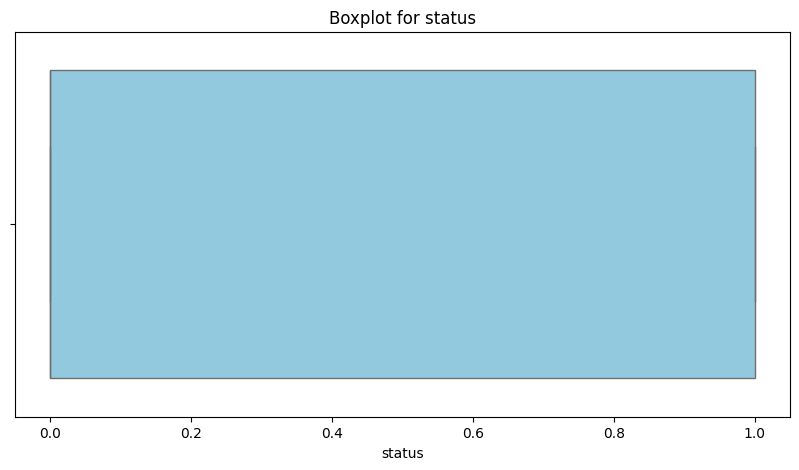

Outliers in status:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status, profile_completion_score]
Index: []
----------------------------------------


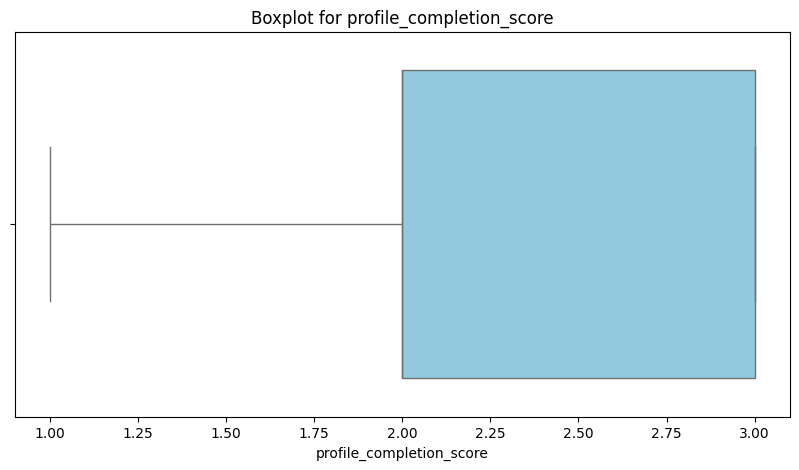

Outliers in profile_completion_score:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status, profile_completion_score]
Index: []
----------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

# Visualize and check for outliers
for column in numerical_columns:
    outliers = find_outliers_iqr(df, column)
    outliers_dict[column] = outliers
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

    print(f"Outliers in {column}:")
    print(outliers)
    print('-' * 40)



Most obviously website_visits and page_views_per_visit contain the most outliers.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate the target variable
Y = df['status']

# Drop the target variable from the feature set
X = df.drop(['status'], axis=1)

# Convert categorical variables into dummy/indicator variables for X
X = pd.get_dummies(X, drop_first=True)

# Compute feature importances using a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, Y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

importance_threshold = 0.01

# Select features above the importance threshold
selected_features = features_df[features_df['importance'] > importance_threshold]['feature'].values

# Create a new DataFrame with only selected important features
X_selected = X[selected_features]

# Split the data into train and test sets with a 70:30 ratio using only selected features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, Y, test_size=0.3, random_state=42, stratify=Y
)

# Output the number of features before and after selection
print(f"Total number of features before selection: {X.shape[1]}")
print(f"Total number of features after selection: {X_selected.shape[1]}")
print(f"Selected features:\n{selected_features}")

Total number of features before selection: 4628
Total number of features after selection: 11
Selected features:
['time_spent_on_website' 'first_interaction_Website' 'age'
 'page_views_per_visit' 'profile_completion_score' 'website_visits'
 'profile_completed_Medium' 'last_activity_Phone Activity'
 'current_occupation_Student' 'current_occupation_Unemployed'
 'last_activity_Website Activity']


In [ ]:

print(f"Training set dimensions: {X_train.shape}")
print(f"Test set dimensions: {X_test.shape}")

train_class_distribution = y_train.value_counts(normalize=True) * 100
print("\nClass distribution in the training set (%):")
for cls, pct in train_class_distribution.items():
    print(f"Class {cls}: {pct:.2f}%")

test_class_distribution = y_test.value_counts(normalize=True) * 100
print("\nClass distribution in the test set (%):")
for cls, pct in test_class_distribution.items():
    print(f"Class {cls}: {pct:.2f}%")

Training set dimensions: (3228, 11)
Test set dimensions: (1384, 11)

Class distribution in the training set (%):
Class 0: 70.14%
Class 1: 29.86%

Class distribution in the test set (%):
Class 0: 70.16%
Class 1: 29.84%


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assume X_train and y_train are already defined

# Initialize and fit the Random Forest Classifier to find important features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Display top 10 features
top_n = 10  # Number of top features to display
top_features = features_df.head(top_n)['feature'].values

print(f"Top {top_n} features by importance:")
print(features_df.head(top_n))

# Create a subset of the training data with only the top features
X_train_top_features = X_train[top_features]

# Print summary statistics for the top features
print("\nSummary statistics for the top features in the training dataset:")
print(X_train_top_features.describe(include='all'))


Top 10 features by importance:
                           feature  importance
0            time_spent_on_website     0.28290
1        first_interaction_Website     0.19122
3             page_views_per_visit     0.13053
2                              age     0.12084
5                   website_visits     0.07245
4         profile_completion_score     0.05532
6         profile_completed_Medium     0.03904
7     last_activity_Phone Activity     0.03690
9    current_occupation_Unemployed     0.03002
10  last_activity_Website Activity     0.02230

Summary statistics for the top features in the training dataset:
        time_spent_on_website first_interaction_Website  page_views_per_visit  \
count              3228.00000                      3228            3228.00000   
unique                    NaN                         2                   NaN   
top                       NaN                      True                   NaN   
freq                      NaN                      1779       

In [ ]:
# Check for missing values in the training dataset
print("\nMissing values in each column of the training dataset:")
print(X_train.isnull().sum())


Missing values in each column of the training dataset:
time_spent_on_website             0
first_interaction_Website         0
age                               0
page_views_per_visit              0
profile_completion_score          0
website_visits                    0
profile_completed_Medium          0
last_activity_Phone Activity      0
current_occupation_Student        0
current_occupation_Unemployed     0
last_activity_Website Activity    0
dtype: int64


We can confirm missing value treatment was not needed given the lack of missing values found.

In [ ]:
# Check the data types of each column in the training dataset
print("\nData types of each column in the training dataset:")
print(X_train.dtypes)


Data types of each column in the training dataset:
time_spent_on_website               int64
first_interaction_Website            bool
age                                 int64
page_views_per_visit              float64
profile_completion_score            int64
website_visits                      int64
profile_completed_Medium             bool
last_activity_Phone Activity         bool
current_occupation_Student           bool
current_occupation_Unemployed        bool
last_activity_Website Activity       bool
dtype: object


For the most part, variables are either int or bool now.

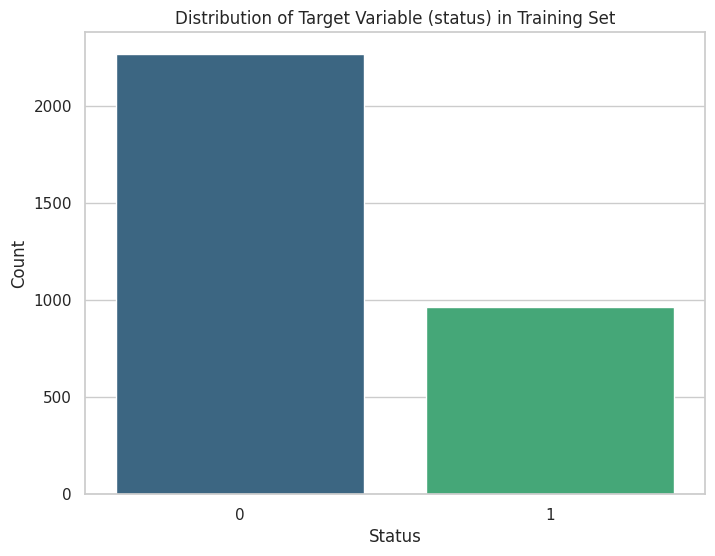

In [ ]:
# Plot the distribution of the target variable in the training data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Target Variable (status) in Training Set')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

As coded, we do see a roughly 70 to 30 ratio of non-converted to converted leads.

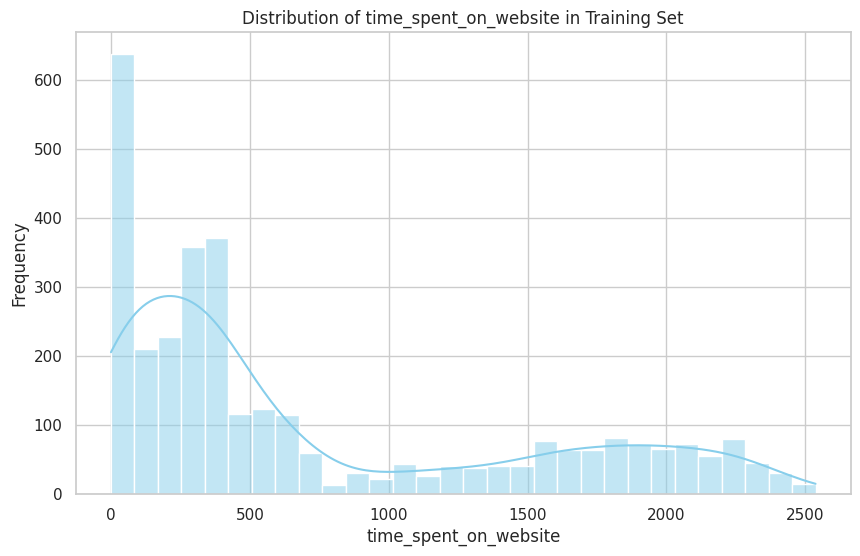

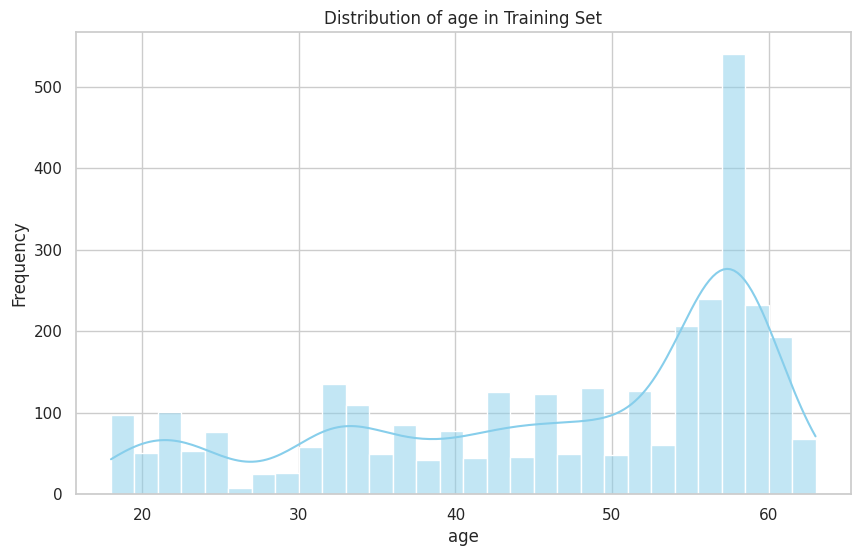

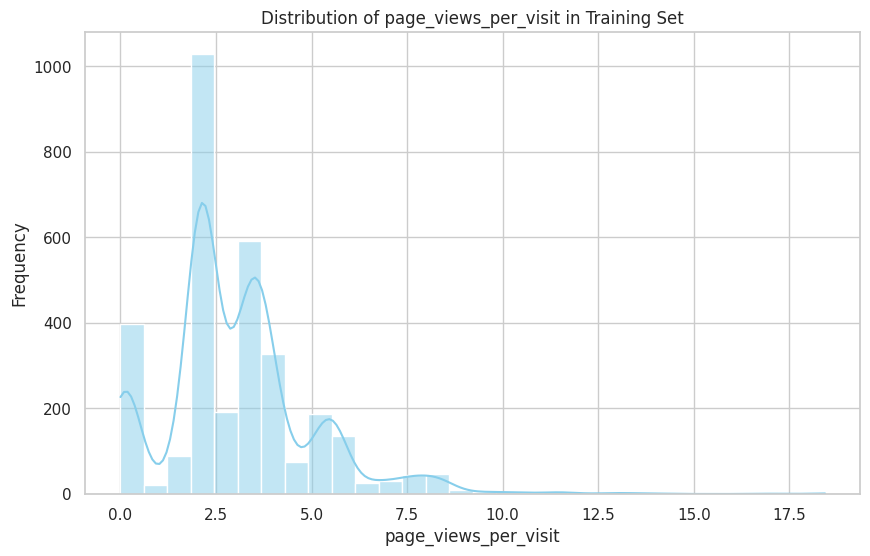

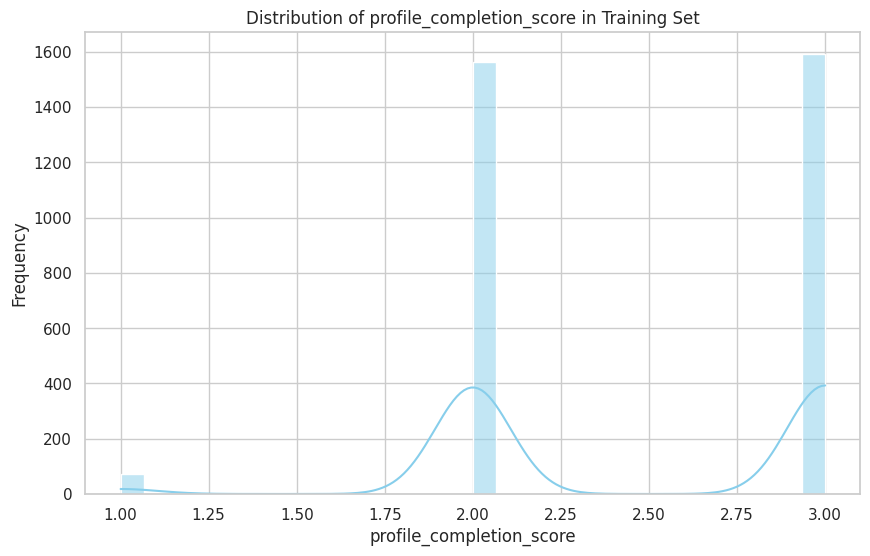

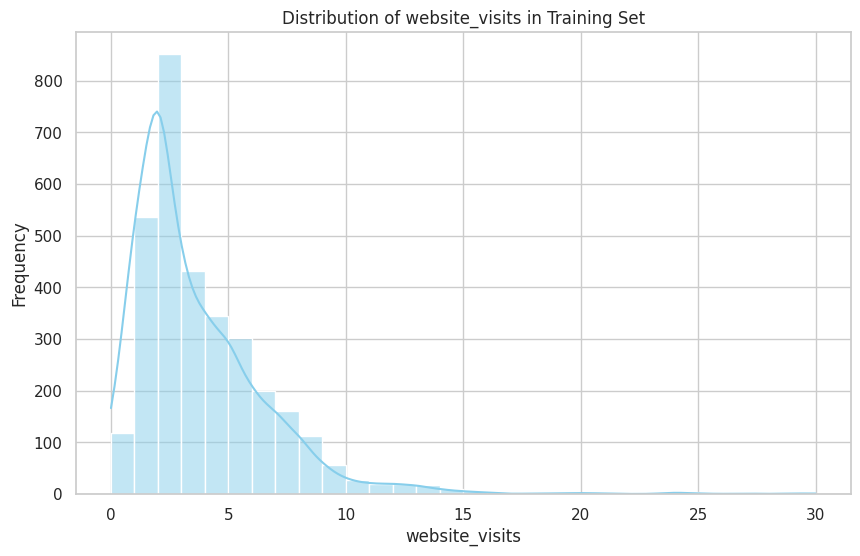

In [ ]:
# Plot the distribution of numerical features in the training data
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature} in Training Set')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

While age has a left skewed histogram, website visits, time spent per visit and pages viewed per visit have very right skewed histograms, and profile_completion_score only has 3 possible values with 2 and 3 being the most common.

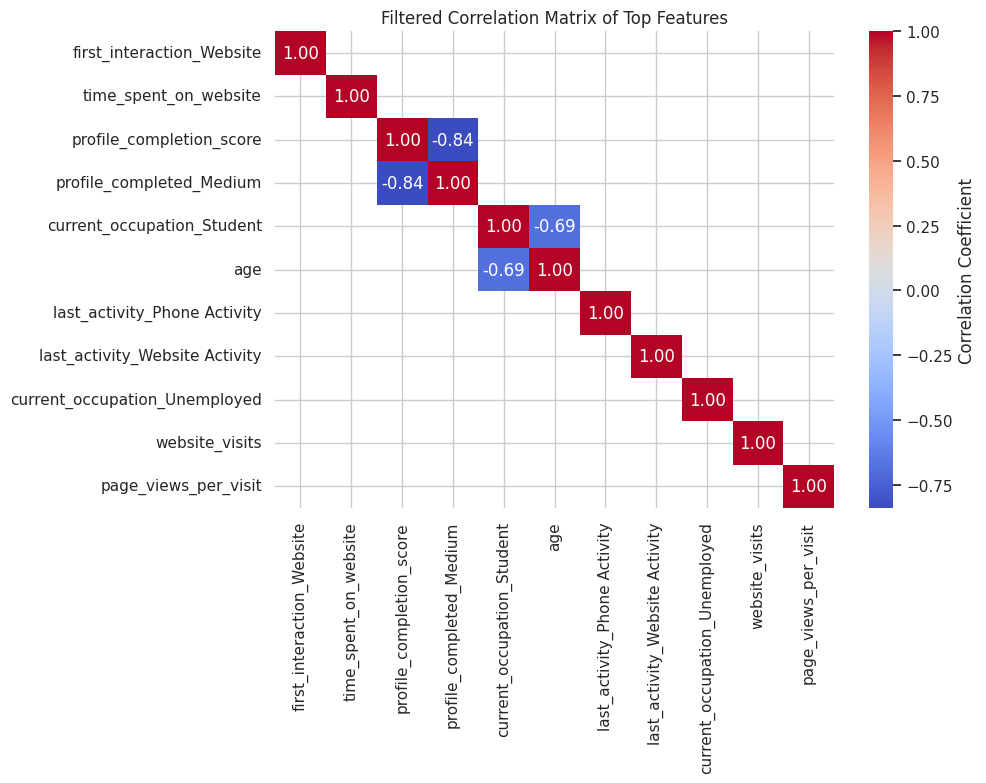

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

# Calculate correlation matrix for all features
correlation_matrix = X_train.corr()

# Determine the correlation of each feature with the target variable
target_correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)

# Select the top 20 most correlated features with the target variable
top_features = target_correlation.head(20).index

# Create a reduced correlation matrix using the top features
reduced_correlation_matrix = X_train[top_features].corr()

# Filter the reduced correlation matrix to only include strong correlations
# Consider correlations above 0.5 or below -0.5
corr_threshold = 0.5
filtered_corr = reduced_correlation_matrix[(reduced_correlation_matrix > corr_threshold) | (reduced_correlation_matrix < -corr_threshold)]

# Plot the filtered correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', mask=filtered_corr.isnull(), cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Filtered Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

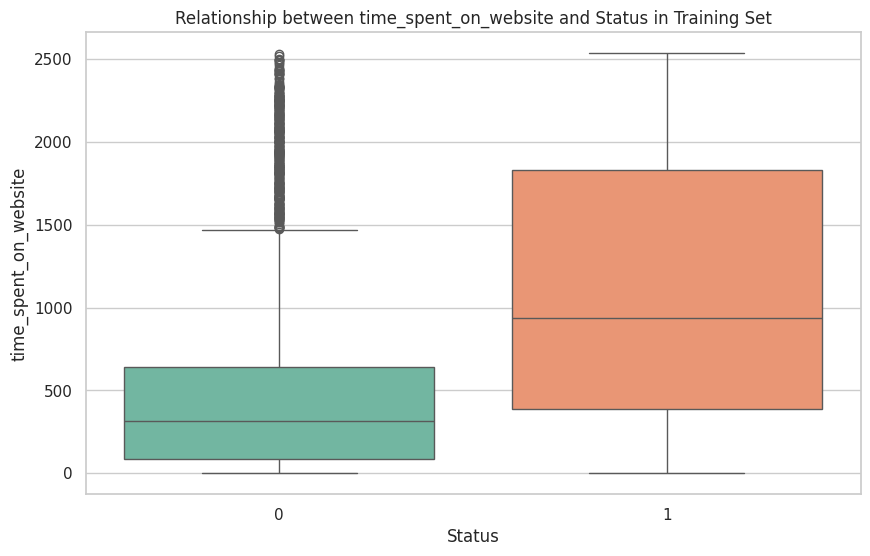

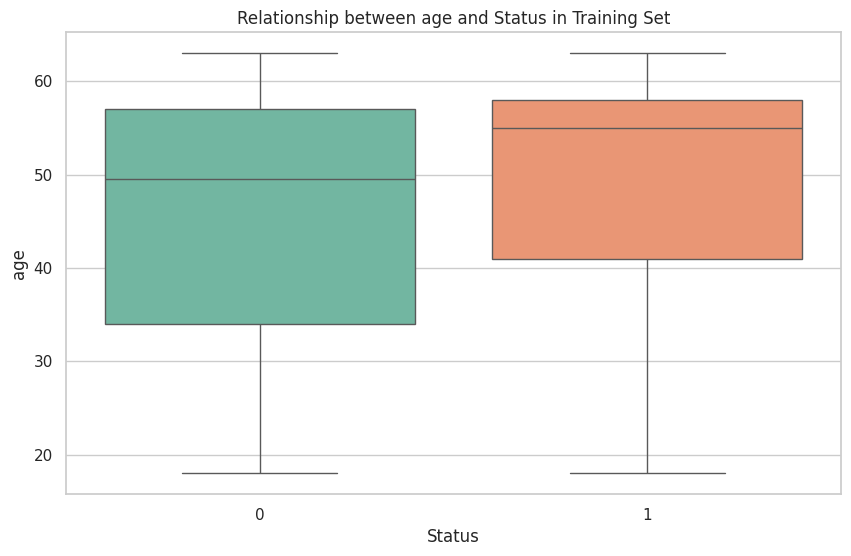

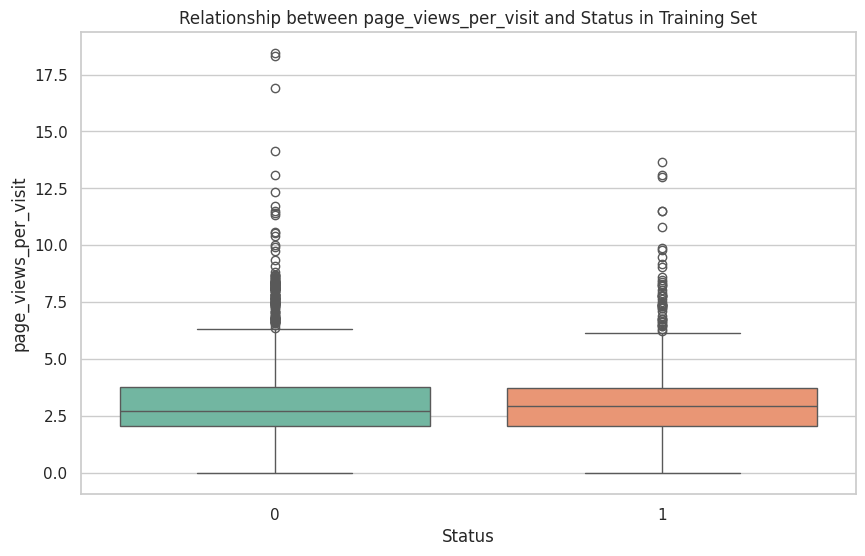

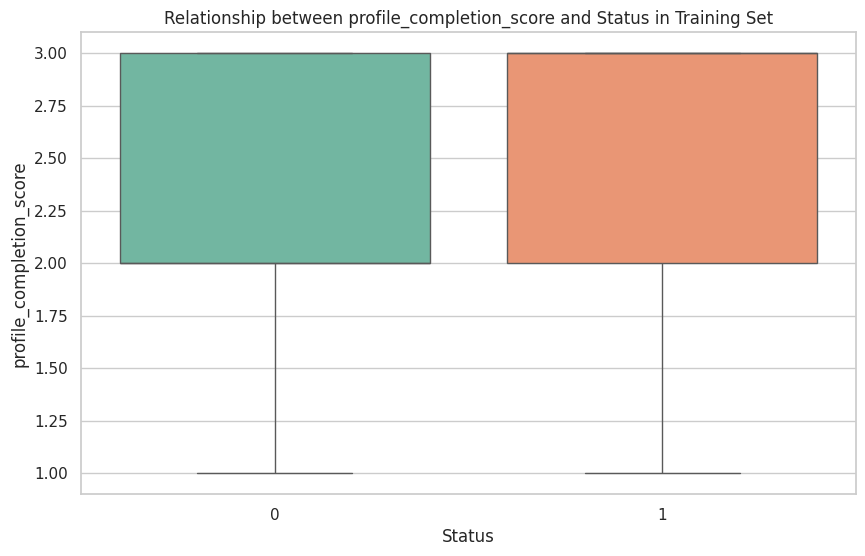

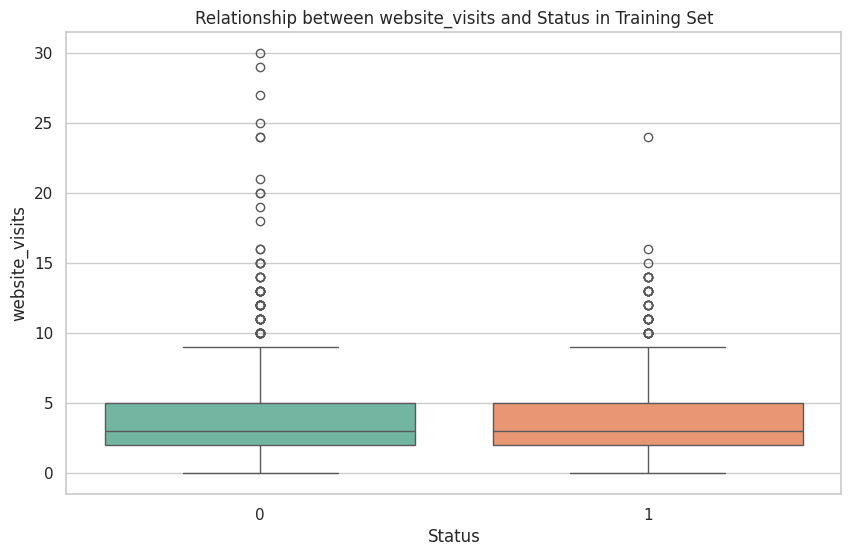

In [ ]:
# Analyze the relationship between numerical features and the target variable in the training data
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y_train, y=X_train[feature], palette='Set2')
    plt.title(f'Relationship between {feature} and Status in Training Set')
    plt.xlabel('Status')
    plt.ylabel(feature)
    plt.show()

Status is not significantly impacted by most of the numerical variables, except for time_spent_on_website. The median for time spent on website is significantly higher for converted leads and this could be because people who are more interested in the product are more likely to spend more time on the website and are thus more likely to convert.

## Building a Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
d_tree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree Classifier on the training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_train1 = d_tree.predict(X_train)

# Define a function to print the performance metrics
def print_classification_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_true, y_pred, average='binary'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print_classification_metrics(y_train, y_pred_train1)

Accuracy: 0.9990706319702602
Precision: 0.9989615784008308
Recall: 0.9979253112033195
F1 Score: 0.998443175921121
Confusion Matrix:
 [[2263    1]
 [   2  962]]


In [ ]:
# Make predictions on the testing data
y_pred_test1 = d_tree.predict(X_test)

# Check the performance on the testing data
print_classification_metrics(y_test, y_pred_test1)

Accuracy: 0.8063583815028902
Precision: 0.6607538802660754
Recall: 0.7215496368038741
F1 Score: 0.6898148148148149
Confusion Matrix:
 [[818 153]
 [115 298]]


## Do we need to prune the tree?

The code above shows a sharp decrease between training and testing data, and the model may be overfitting. Pruning does indeed seem to be a helpful step in the process, so let's do so below!

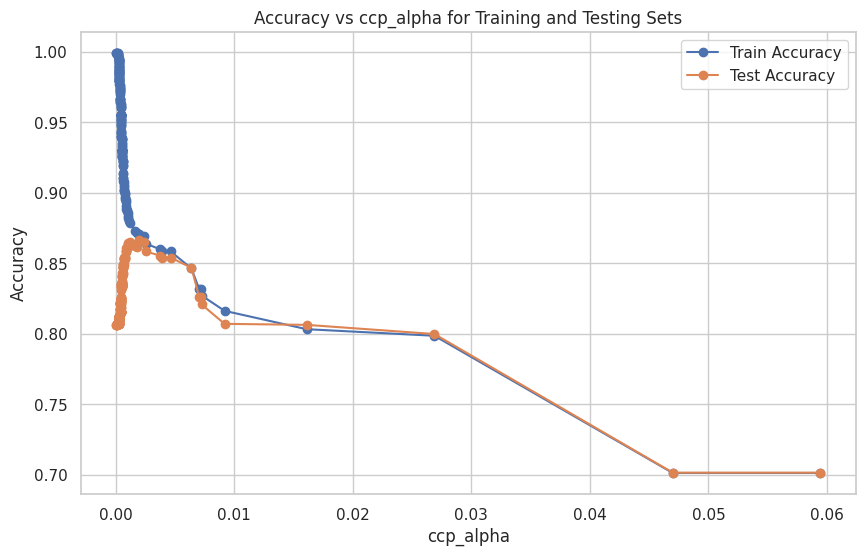

Performance on the Training Data:
Accuracy: 0.8705080545229245
Precision: 0.837037037037037
Recall: 0.7033195020746889
F1 Score: 0.7643742953776775
Confusion Matrix:
 [[2132  132]
 [ 286  678]]

Performance on the Testing Data:
Accuracy: 0.8663294797687862
Precision: 0.8220338983050848
Recall: 0.7046004842615012
F1 Score: 0.758800521512386
Confusion Matrix:
 [[908  63]
 [122 291]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Fit a decision tree classifier to determine the optimal ccp_alpha
initial_tree = DecisionTreeClassifier(random_state=42)
path = initial_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Evaluate the impact of different ccp_alphas on training and test accuracy
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    d_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    d_tree_pruned.fit(X_train, y_train)
    train_scores.append(d_tree_pruned.score(X_train, y_train))
    test_scores.append(d_tree_pruned.score(X_test, y_test))

# Plot the accuracy for each ccp_alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha for Training and Testing Sets')
plt.legend()
plt.grid(True)
plt.show()

# Choose the optimal ccp_alpha that balances training and testing accuracy
optimal_ccp_alpha = ccp_alphas[np.argmax(test_scores)]

# Fit the decision tree with the optimal ccp_alpha
d_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
d_tree_pruned.fit(X_train, y_train)

# Function to print classification metrics
def print_classification_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_true, y_pred, average='binary'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Make predictions on the training data
y_pred_train_pruned = d_tree_pruned.predict(X_train)

# Check performance on the training data
print("Performance on the Training Data:")
print_classification_metrics(y_train, y_pred_train_pruned)

# Make predictions on the testing data
y_pred_test_pruned = d_tree_pruned.predict(X_test)

# Check performance on the testing data
print("\nPerformance on the Testing Data:")
print_classification_metrics(y_test, y_pred_test_pruned)

By pruning the data, there is a significant parity between the models performance on the testing and training data, and the model becomes more accurate and precise, albeit losing recall.

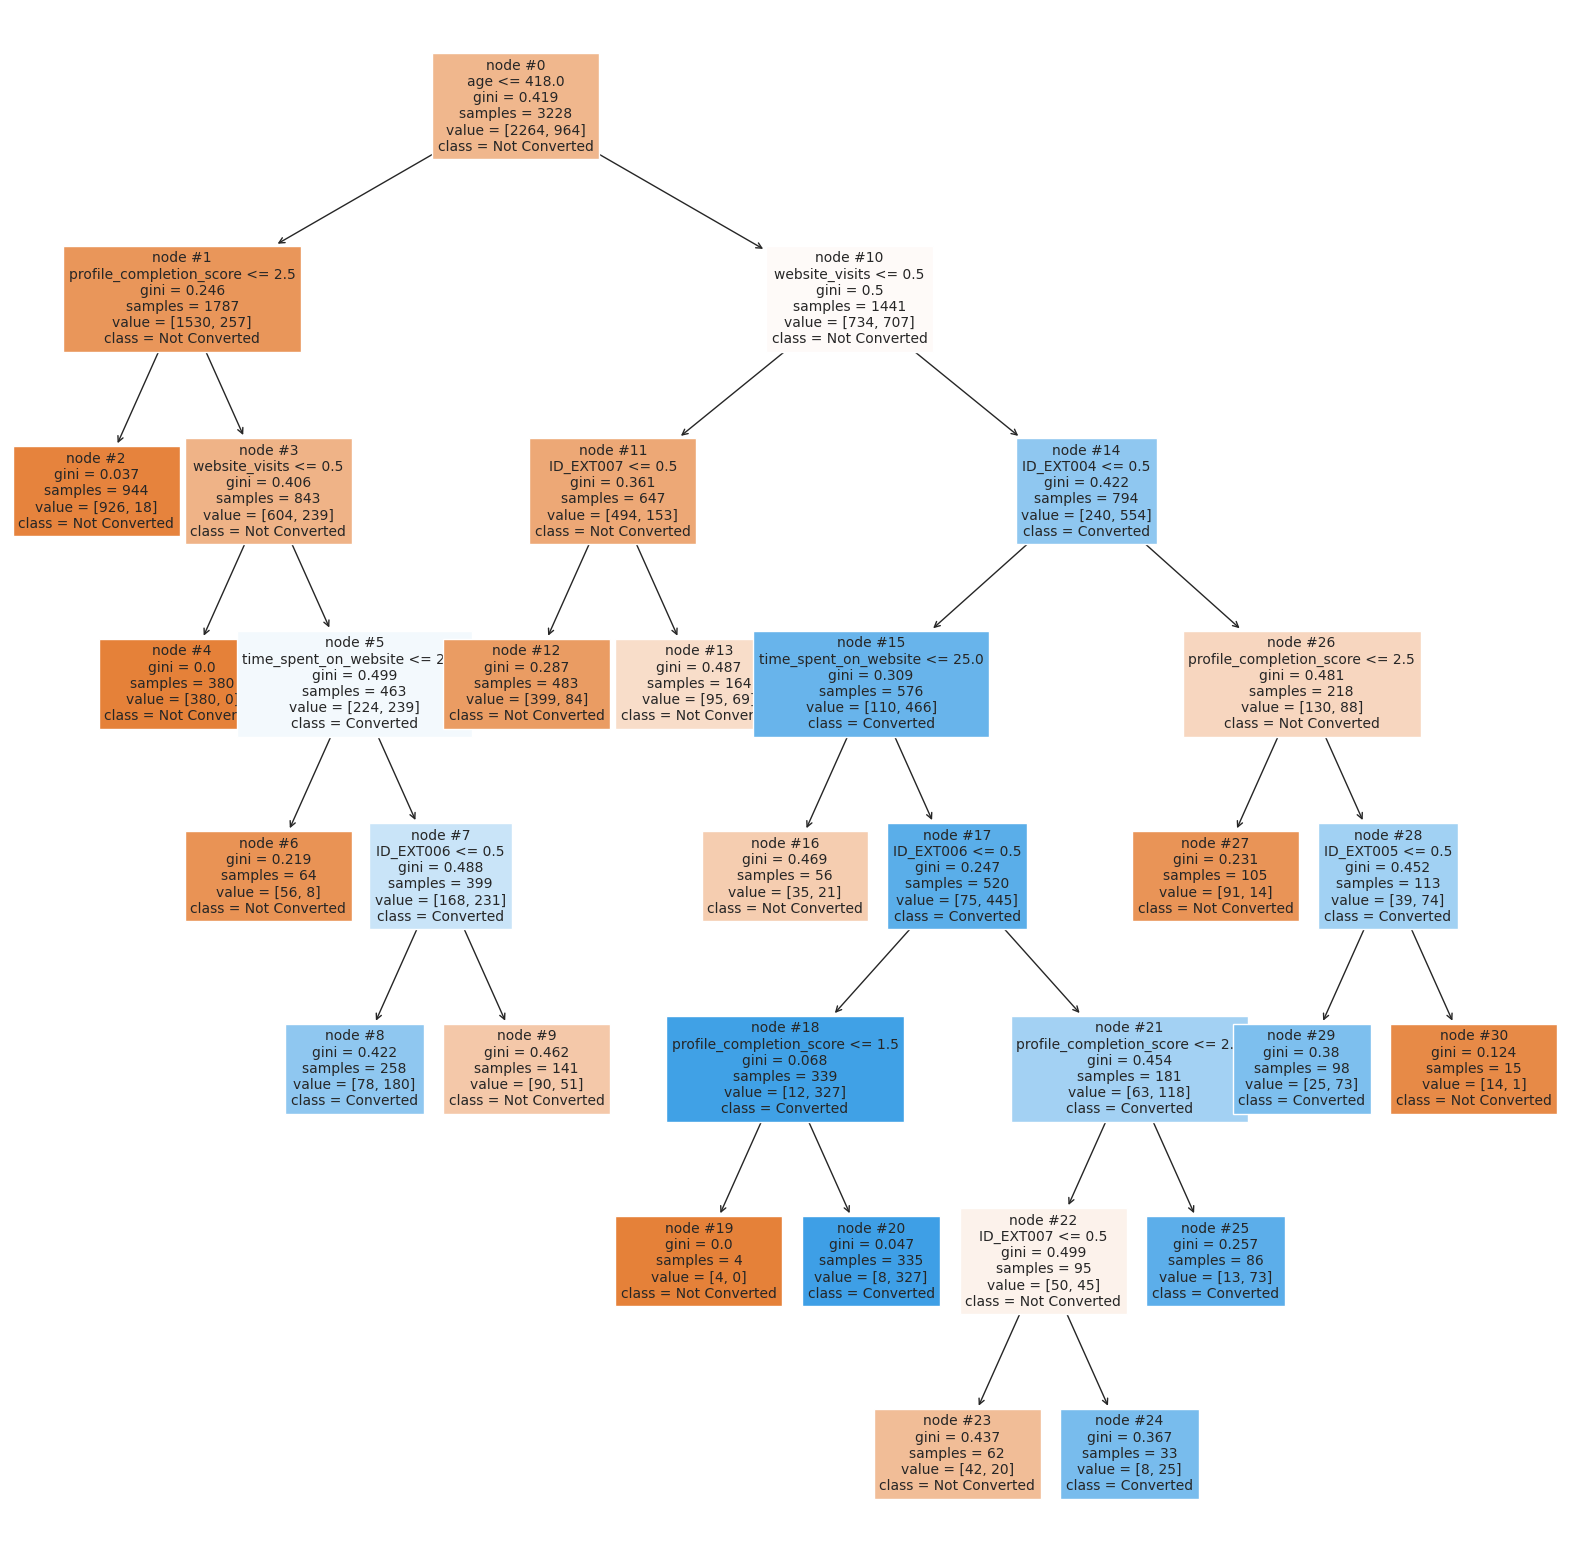

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract feature names from the DataFrame
feature_names = X.columns.tolist()

# Set the plot size for the tree visualization
plt.figure(figsize=(20, 20))

# Plot the decision tree using the plot_tree function
plot_tree(
    d_tree_pruned,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=True,
    class_names=['Not Converted', 'Converted']
)

# Display the plot
plt.show()

Feature Importances for Selected Features:
                           Feature  Importance
1        first_interaction_Website     0.35352
0            time_spent_on_website     0.25803
4         profile_completion_score     0.15077
7     last_activity_Phone Activity     0.06988
2                              age     0.06199
9    current_occupation_Unemployed     0.05870
10  last_activity_Website Activity     0.03102
8       current_occupation_Student     0.01609
3             page_views_per_visit     0.00000
5                   website_visits     0.00000
6         profile_completed_Medium     0.00000


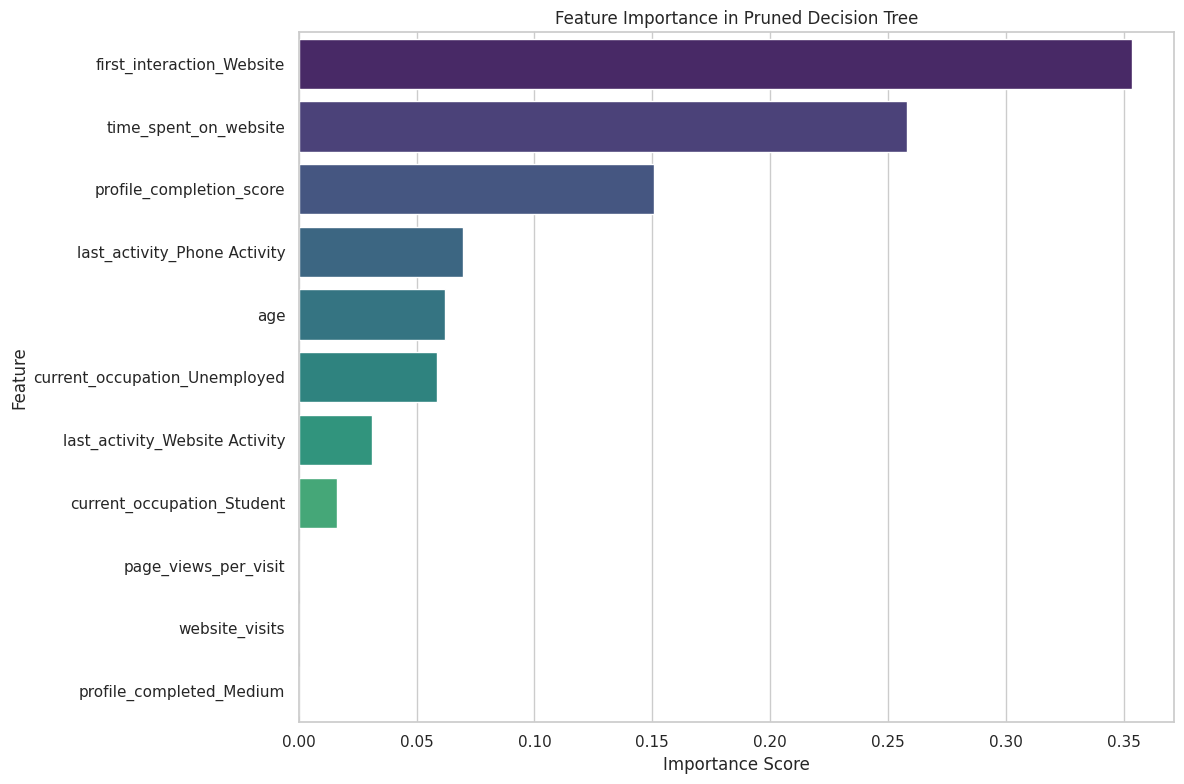

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = d_tree_pruned.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importances for Selected Features:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('Feature Importance in Pruned Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


We can see that for the pruned model, first_interaction_website was easily the most important feature, with ~0.35 importance, followed by time_spent_on_website, then profile_completion_score, then last_activity_Phone Activity, age, current_occupation_unemployed, last website activity, and current_occupation_student. It appears that all the other features had very little to no importance towards the model.

## Building a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_estimator = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Fit the Random Forest Classifier on the training data
rf_estimator.fit(X_train, y_train)

# Function to print classification metrics
def print_classification_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall:", recall_score(y_true, y_pred, average='binary'))
    print("F1 Score:", f1_score(y_true, y_pred, average='binary'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Make predictions on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

# Check performance on the training data
print("Performance on the Training Data (Random Forest):")
print_classification_metrics(y_train, y_pred_train_rf)

# Make predictions on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

# Check performance on the testing data
print("\nPerformance on the Testing Data (Random Forest):")
print_classification_metrics(y_test, y_pred_test_rf)

Performance on the Training Data (Random Forest):
Accuracy: 0.8968401486988847
Precision: 0.8501664816870145
Recall: 0.7946058091286307
F1 Score: 0.8214477211796246
Confusion Matrix:
 [[2129  135]
 [ 198  766]]

Performance on the Testing Data (Random Forest):
Accuracy: 0.8663294797687862
Precision: 0.7953367875647669
Recall: 0.7433414043583535
F1 Score: 0.7684605757196495
Confusion Matrix:
 [[892  79]
 [106 307]]


## Do we need to prune the tree?

Based on the performance above, the random forest classifier definitely does not need to be pruned due to the definite lack of overfitting highlighted by the lower accuracy of the model on training data compared to the decision tree unpruned and nearly identical accuracy of the model between training and testing data. However, the model can certainly be optimized and it can be done through hyperparameterized tuning.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 110],
    "max_depth": [6, None],
    "min_samples_leaf": [10],
    "max_features": ['sqrt'],
    "class_weight": ["balanced"]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(
    estimator=rf_estimator_tuned,
    param_grid=parameters,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Output the best parameters and model performance on training and testing datasets
print("Best parameters found:", grid_obj.best_params_)
print("\nPerformance on the Training Data (Tuned Random Forest):")
y_pred_train_tuned = rf_estimator_tuned.predict(X_train)
print_classification_metrics(y_train, y_pred_train_tuned)

print("\nPerformance on the Testing Data (Tuned Random Forest):")
y_pred_test_tuned = rf_estimator_tuned.predict(X_test)
print_classification_metrics(y_test, y_pred_test_tuned)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 110}

Performance on the Training Data (Tuned Random Forest):
Accuracy: 0.8550185873605948
Precision: 0.7130584192439863
Recall: 0.8609958506224067
F1 Score: 0.7800751879699248
Confusion Matrix:
 [[1930  334]
 [ 134  830]]

Performance on the Testing Data (Tuned Random Forest):
Accuracy: 0.851878612716763
Precision: 0.7088353413654619
Recall: 0.8547215496368039
F1 Score: 0.7749725576289791
Confusion Matrix:
 [[826 145]
 [ 60 353]]


While this tuned model's recall is significantly better than the untuned model, the precision and accuracy of this model are noticeably worse compared to before, while the F1 score actually is slightly better. Based on the F1 score however, the decision tree does appear to work better for the data set holistically, especially given the extraordinarily large number of false positives that were predicted using the tuned random forest classifier.

## Actionable Insights and Recommendations



*   The models above are well suited for identifying potential customers but often neglects actual conversions. The business should focus on finding and capturing more leads so that the overall conversion rate may increase.
*   It may be worthwhile to find new features, or capture new data, to continue increasing the effectiveness of the model, and by consequence conversion rate of leads, as the model will continue to improve if it can identify more features that have significant levels of importance to lead conversion. This can especially be seen by the importance of the profile_completion_score feature for the model, which shows that having more details about a client can significantly boost the model's performance.


*   In the data set, there is a signifcantly larger number of non-converted leads than converted leads. This will lead to less optimized performance of the model. In the future, it would be really helpful if the data set had a much more balanced ration of non-converted vs converted leads, so that models trained on this data would have better performance and will be better suited for identifying potential leads.
*   Since first_interaction_on_website and time_spent_on_website are key predictors of lead conversion, I suggest that your website is a critical platform for engaging potential customers. Improving the user experience and engagement on your website can significantly boost conversion rates. This can be done by improving the user interface of the website or putting out more advertisements that link to the website in particular.


*   Age was also one of the most important features used in the model, and through univariate analysis we saw that most people who used the website were in their 40s and 50s. It may be worthwhile for ExtraaLearn to research this specific demographic's preferences so that ExtraaLearn can more effectively advertise to this group.





